<h1><center><center><h1><h1><center><span style="color:#3495eb">Airline Passenger</span><center><h1>

# My Libraries :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from colorama import Fore

# My Figure Size :

In [2]:
from matplotlib import rcParams            
rcParams['figure.figsize'] = (8,6)  

# Remove Warning :

In [3]:
import warnings
warnings.simplefilter("ignore")

# Dataset :

In [4]:
passenger_data = pd.read_csv('Datasets/airline_passenger_satisfaction.csv')
passenger_data.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


# Exploring The Data :

### Data info :

In [5]:
passenger_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

### Data shape :

In [6]:
print(Fore.LIGHTBLUE_EX + 'Number of Rows is : ', passenger_data.shape[0])
print(Fore.LIGHTBLUE_EX + 'Number of columns is : ', passenger_data.shape[1])

Number of Rows is :  129880
Number of columns is :  24


### Data duplicates :

In [7]:
print(Fore.LIGHTBLUE_EX,'There is "{}" complete duplicate'.format(passenger_data.duplicated().sum()))

 There is "0" complete duplicate


### Droping `ID` column and showing Data duplicates without `ID` :

In [8]:
try:
    passenger_data.drop('ID',axis=1)
    print(Fore.LIGHTBLUE_EX,'There is "{}" duplicate'.format(passenger_data.duplicated().sum()))
except:
    print('Dropped before !!')
    print(Fore.LIGHTBLUE_EX,'There is "{}" duplicate'.format(passenger_data.duplicated().sum()))

 There is "0" duplicate


### Number of NaN values :

In [9]:
passenger_data.isna().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

### Summary statistics of the data :

In [10]:
passenger_data.drop('ID',axis=1).describe()

,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,15.119360,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


### Showing value counts of categorical data :

In [11]:
for i in passenger_data.columns:
    if passenger_data[i].dtype == 'object':
        print(Fore.LIGHTBLUE_EX,passenger_data[i].value_counts())
        print(Fore.BLACK + '\n--------------------------------------\n\n')

 Female    65899
Male      63981
Name: Gender, dtype: int64

--------------------------------------


 Returning     106100
First-time     23780
Name: Customer Type, dtype: int64

--------------------------------------


 Business    89693
Personal    40187
Name: Type of Travel, dtype: int64

--------------------------------------


 Business        62160
Economy         58309
Economy Plus     9411
Name: Class, dtype: int64

--------------------------------------


 Neutral or Dissatisfied    73452
Satisfied                  56428
Name: Satisfaction, dtype: int64

--------------------------------------




## Ok Now I got important informations about the data :
> - No complete dupicates. <br><br>
> - Generally no duplicates to remove.<br><br>
> - Only `Arrival Delay` has some NaN values.

## Before I start let me check my dependent variable :

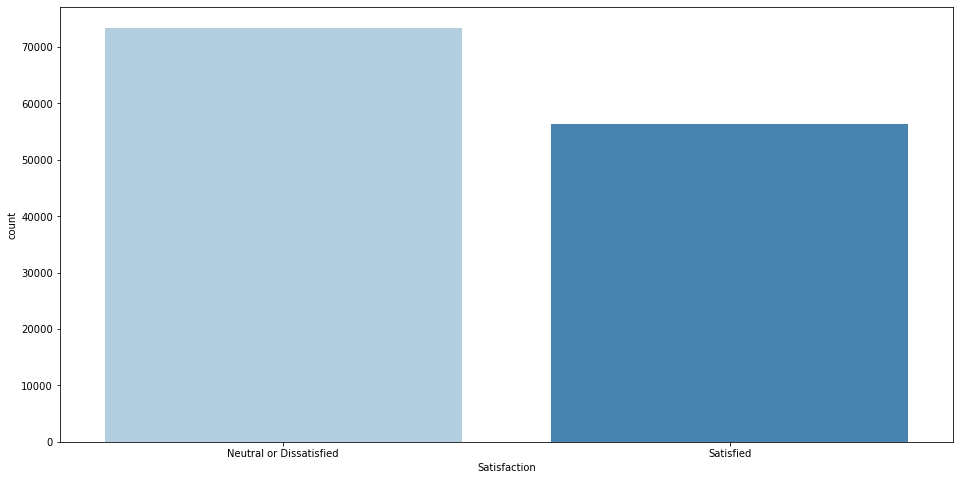

In [12]:
fig = plt.figure(figsize=(16,8))

sns.countplot(x='Satisfaction',data=passenger_data,palette='Blues')
plt.show()

## There is an obvious data imbalance here :
### This must be treated before the model.

<br><br><br><br><br><br><br><br>

# Let's start the actual work now :)

### Splitting the data first :

In [13]:
from sklearn.model_selection import train_test_split

x = passenger_data.drop('Satisfaction',axis=1)
y = passenger_data[['Satisfaction']]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [14]:
X_train.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
57644,57645,Male,56,Returning,Business,Business,1848,0,0.0,4,...,4,4,5,4,1,4,4,4,4,4
103332,103333,Female,70,Returning,Personal,Economy,1371,3,0.0,5,...,2,1,5,3,4,4,1,3,1,1
76605,76606,Female,48,Returning,Business,Business,2473,0,0.0,3,...,3,5,5,5,5,4,5,3,5,5
121595,121596,Male,63,Returning,Personal,Economy,912,40,28.0,1,...,3,4,5,4,5,5,2,3,5,2
107087,107088,Male,57,Returning,Business,Business,562,12,0.0,4,...,4,4,4,4,3,4,4,4,4,4


In [15]:
y_train.head()

,Satisfaction
57644,Satisfied
103332,Neutral or Dissatisfied
76605,Satisfied
121595,Neutral or Dissatisfied
107087,Satisfied


## For visualizations I will make a new dataframe which is `train_set` (X_train + y_train)

In [16]:
train_set = pd.concat([X_train,y_train],axis=1)
train_set

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
57644,57645,Male,56,Returning,Business,Business,1848,0,0.0,4,...,4,5,4,1,4,4,4,4,4,Satisfied
103332,103333,Female,70,Returning,Personal,Economy,1371,3,0.0,5,...,1,5,3,4,4,1,3,1,1,Neutral or Dissatisfied
76605,76606,Female,48,Returning,Business,Business,2473,0,0.0,3,...,5,5,5,5,4,5,3,5,5,Satisfied
121595,121596,Male,63,Returning,Personal,Economy,912,40,28.0,1,...,4,5,4,5,5,2,3,5,2,Neutral or Dissatisfied
107087,107088,Male,57,Returning,Business,Business,562,12,0.0,4,...,4,4,4,3,4,4,4,4,4,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10710,10711,Female,48,Returning,Business,Business,3391,19,10.0,5,...,2,4,2,1,2,2,2,2,2,Neutral or Dissatisfied
115604,115605,Female,70,Returning,Business,Business,446,0,0.0,1,...,4,4,4,4,4,4,1,4,4,Satisfied
48449,48450,Male,37,Returning,Business,Economy,819,24,17.0,2,...,3,2,5,2,2,5,2,2,1,Satisfied
15398,15399,Male,21,First-time,Business,Economy,433,0,0.0,0,...,5,2,3,2,2,3,3,2,4,Neutral or Dissatisfied


### I will do some cleaning while working on the train_set then I will remember all of what I will do then,<br><br> I will put all of them on a pipline and I will apply this pipline on `X_train` and `X_test` data

In [17]:
try:
    train_set.drop('ID',inplace=True,axis=1)
except:
    print('Dropped before !!')

## Now I will work on understanding the train_set without looking at test (to avoid overfitting by knowing the test relations) <br><br><br><br>

<br><br><br><br><br><br>

# Let's explore more using data visualizations :

<br><br>

# Categorical Data :

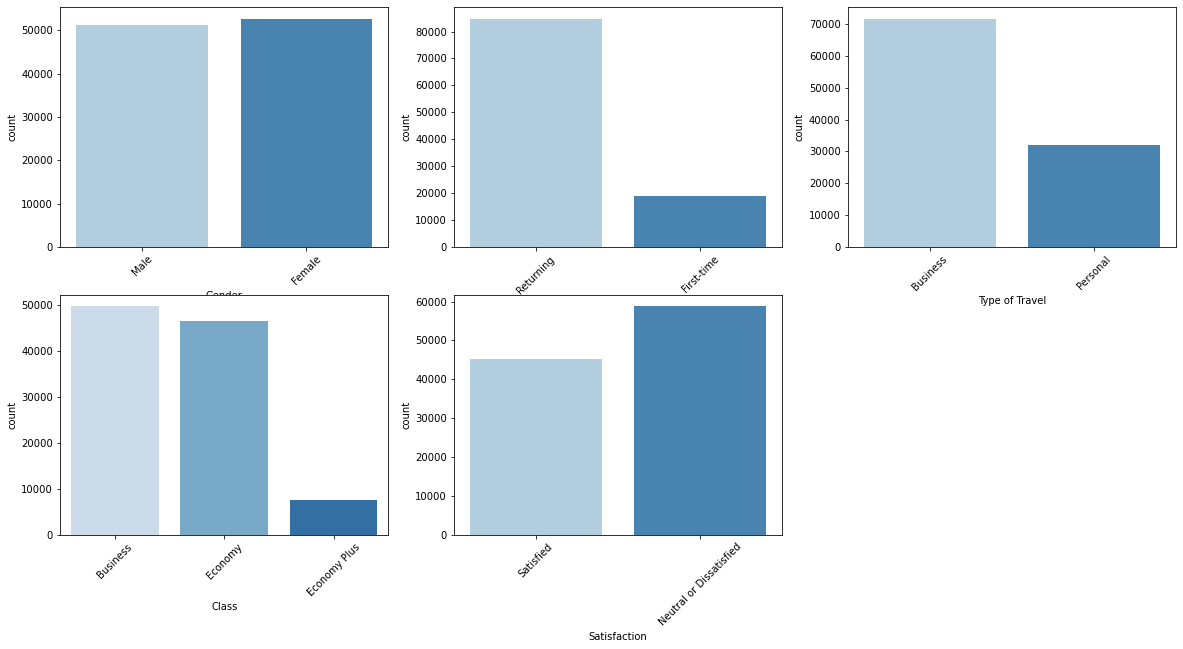

In [18]:
fig = plt.figure(figsize=(20,15))

counter = 0

for i in train_set.columns:
    if train_set[i].dtype == 'object':
        sub = fig.add_subplot(3,3,counter+1)
        g = sns.countplot(x=i,data=train_set,palette='Blues')
        plt.xticks(rotation=45)
        counter = counter + 1

### Let's see how does this features effect our target variable :

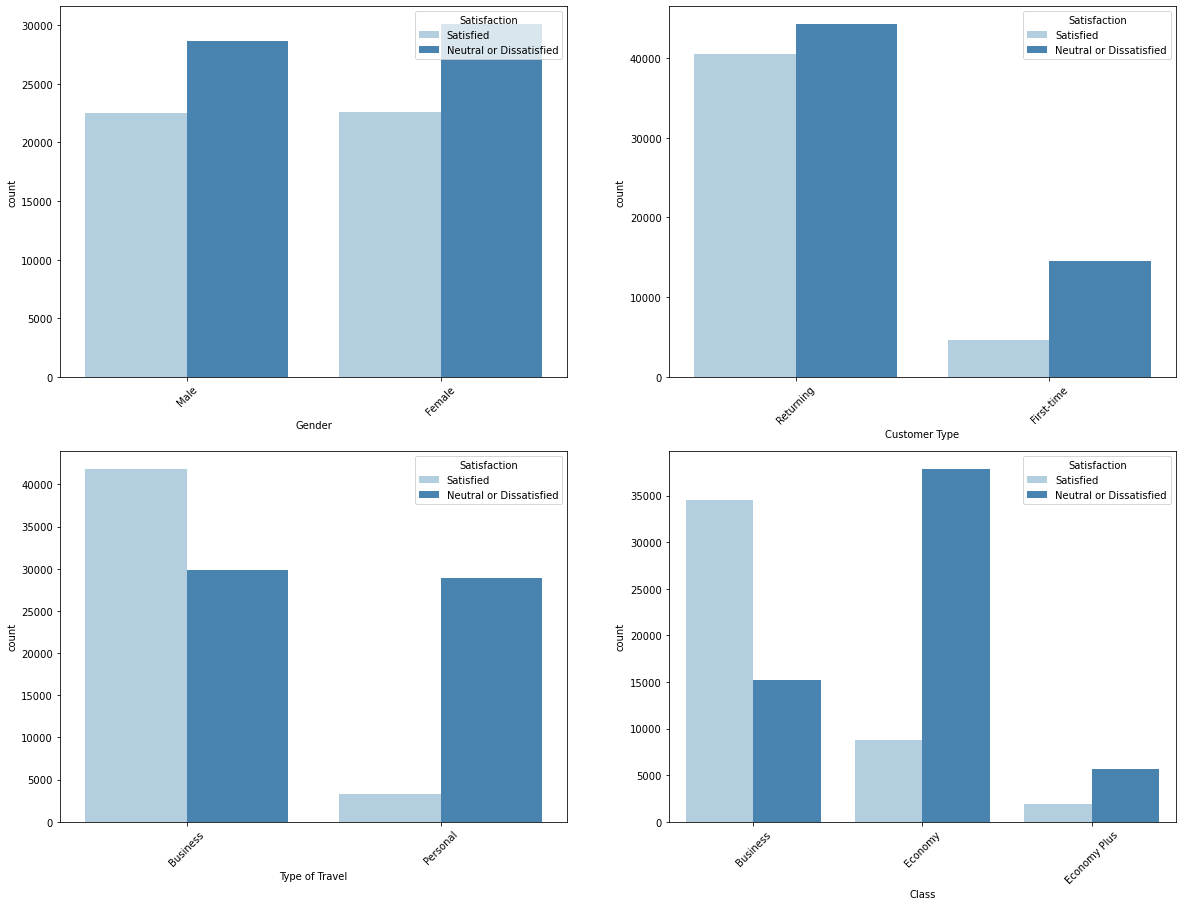

In [19]:
fig = plt.figure(figsize=(20,15))

counter = 0

for i in train_set.columns:
    if train_set[i].dtype == 'object' and i != 'Satisfaction':
        sub = fig.add_subplot(2,2,counter+1)
        g = sns.countplot(x=i,data=train_set,palette='Blues',hue='Satisfaction')
        plt.xticks(rotation=45)
        counter = counter + 1

## Looks like `Gender` feature doesn't effect the target variable at all... <br>
### We will try to remove it and measure accuracy without it

### Other variables have an effect on the `target variable` so it looks fine for now !!
<br><br><br><br>

# Continous Data :

## Let's start by showing correlations between our features :

In [20]:
countinous_data = []

for i in train_set.columns:
    if train_set[i].dtype != 'object':
        countinous_data.append(i)
        

print(countinous_data)

['Age', 'Flight Distance', 'Departure Delay', 'Arrival Delay', 'Departure and Arrival Time Convenience', 'Ease of Online Booking', 'Check-in Service', 'Online Boarding', 'Gate Location', 'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness', 'Food and Drink', 'In-flight Service', 'In-flight Wifi Service', 'In-flight Entertainment', 'Baggage Handling']


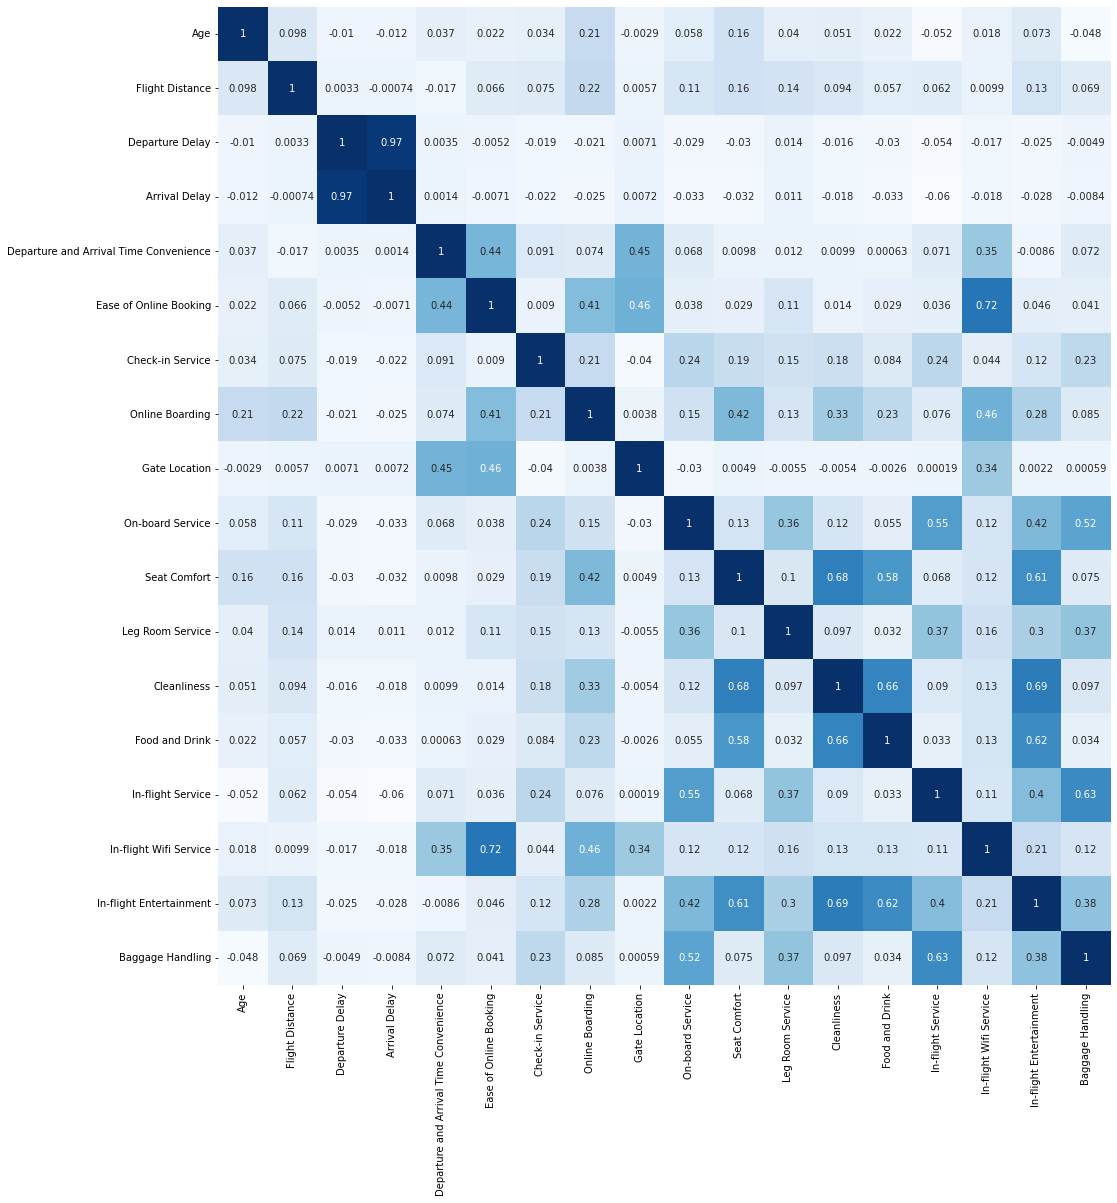

In [21]:
plt.figure(figsize=(16, 18))
heatmap = sns.heatmap(train_set[countinous_data].corr(), annot=True,cmap='Blues',cbar=False)

### Looks like there is a very strong correlation between `Departure Delay` and `Arrival Delay` 
### Given that `Arrival Delay` has NaN values So we will drop the whole coumn :

In [22]:
try :
    train_set.drop('Arrival Delay',inplace=True,axis=1)
except:
    print("Dropped before !!!")

### Ok I have too much continous data here, I want to know more about them :

### Let's try to understand them first and the number of their variables :

In [23]:
countinous_data.remove('Arrival Delay')

for i in countinous_data:
    print(Fore.LIGHTBLACK_EX,'\nNumber of unique data in the {} is : '.format(i)
            ,Fore.LIGHTBLUE_EX,len(train_set[i].unique()))

 
Number of unique data in the Age is :   75
 
Number of unique data in the Flight Distance is :   3803
 
Number of unique data in the Departure Delay is :   448
 
Number of unique data in the Departure and Arrival Time Convenience is :   6
 
Number of unique data in the Ease of Online Booking is :   6
 
Number of unique data in the Check-in Service is :   5
 
Number of unique data in the Online Boarding is :   6
 
Number of unique data in the Gate Location is :   5
 
Number of unique data in the On-board Service is :   6
 
Number of unique data in the Seat Comfort is :   5
 
Number of unique data in the Leg Room Service is :   6
 
Number of unique data in the Cleanliness is :   6
 
Number of unique data in the Food and Drink is :   6
 
Number of unique data in the In-flight Service is :   6
 
Number of unique data in the In-flight Wifi Service is :   6
 
Number of unique data in the In-flight Entertainment is :   6
 
Number of unique data in the Baggage Handling is :   5


<Figure size 576x432 with 0 Axes>

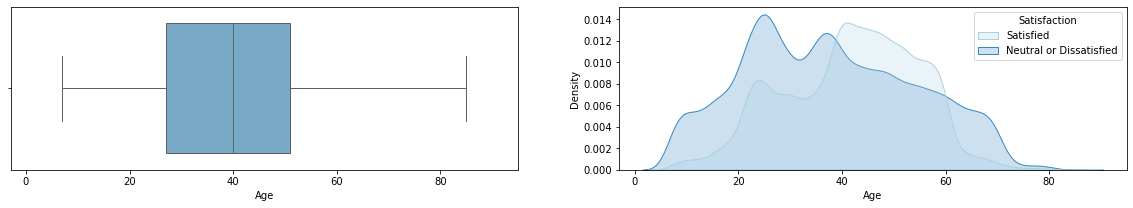

<Figure size 1440x216 with 0 Axes>

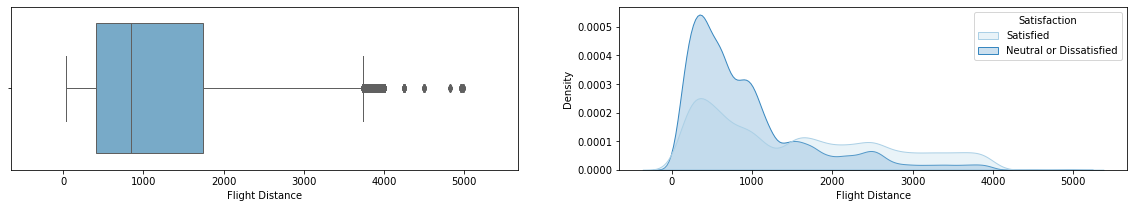

<Figure size 1440x216 with 0 Axes>

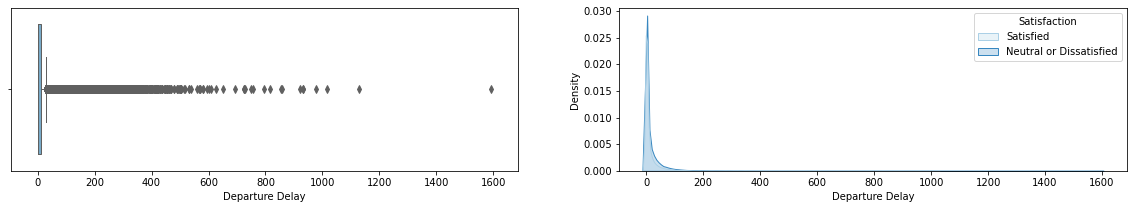

<Figure size 1440x216 with 0 Axes>

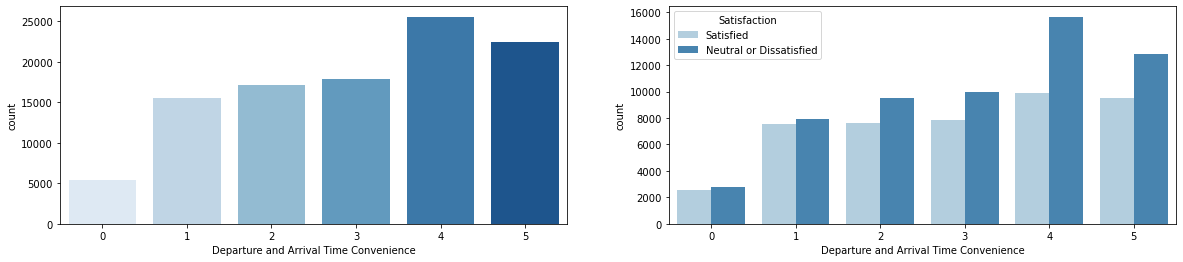

<Figure size 1440x288 with 0 Axes>

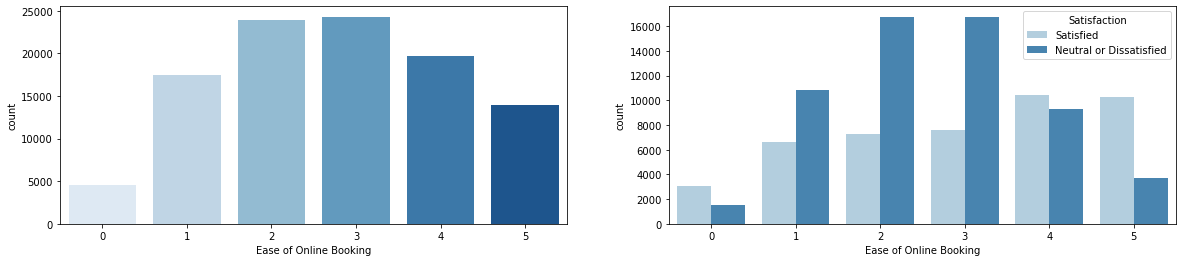

<Figure size 1440x288 with 0 Axes>

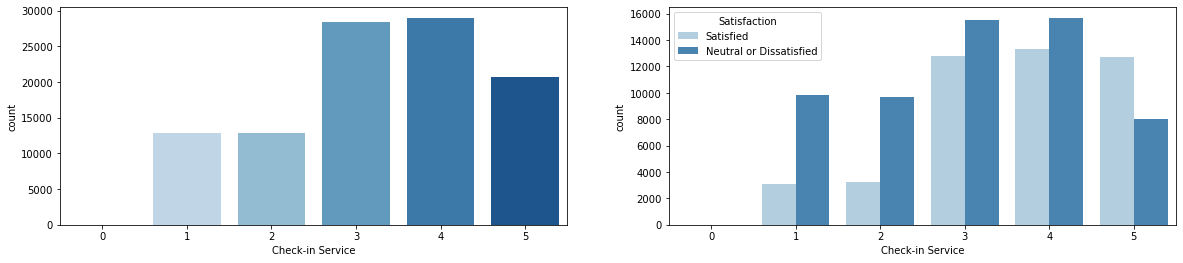

<Figure size 1440x288 with 0 Axes>

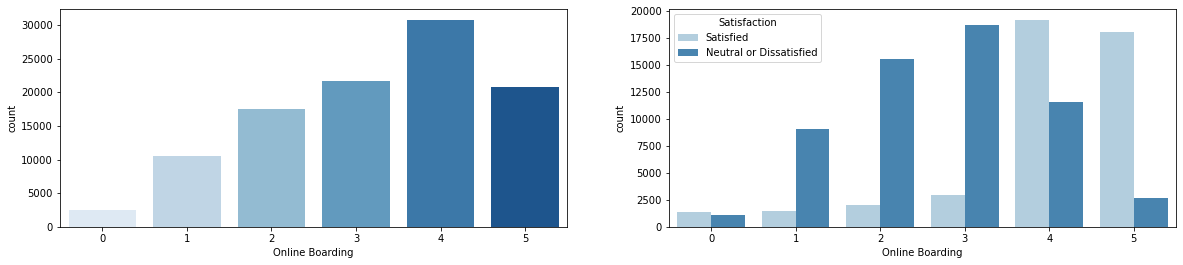

<Figure size 1440x288 with 0 Axes>

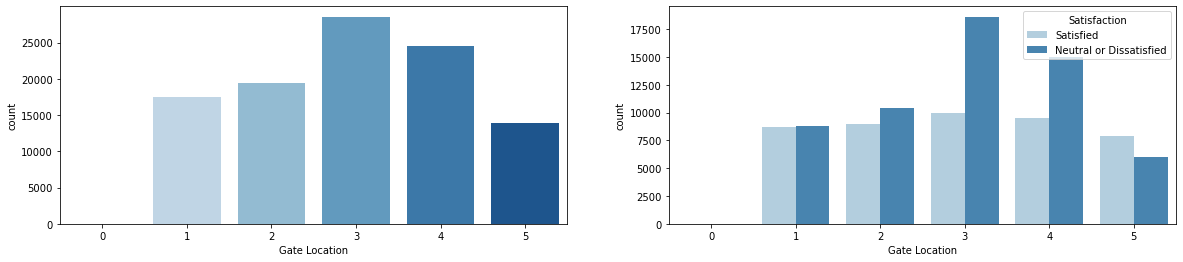

<Figure size 1440x288 with 0 Axes>

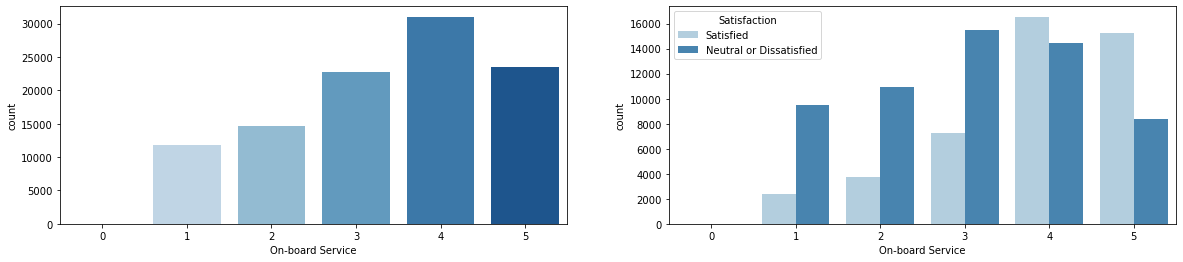

<Figure size 1440x288 with 0 Axes>

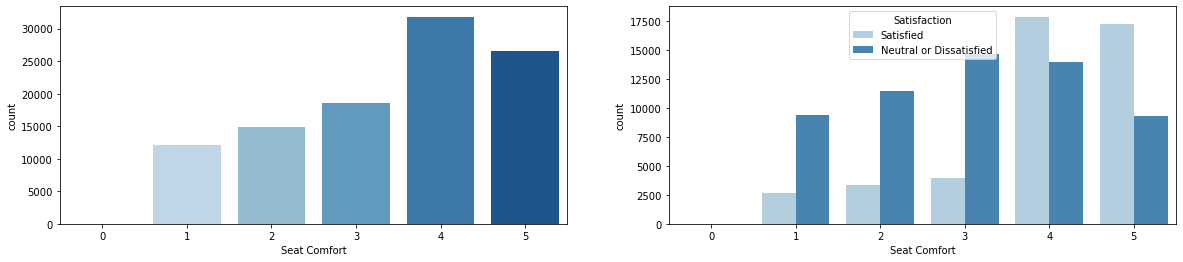

<Figure size 1440x288 with 0 Axes>

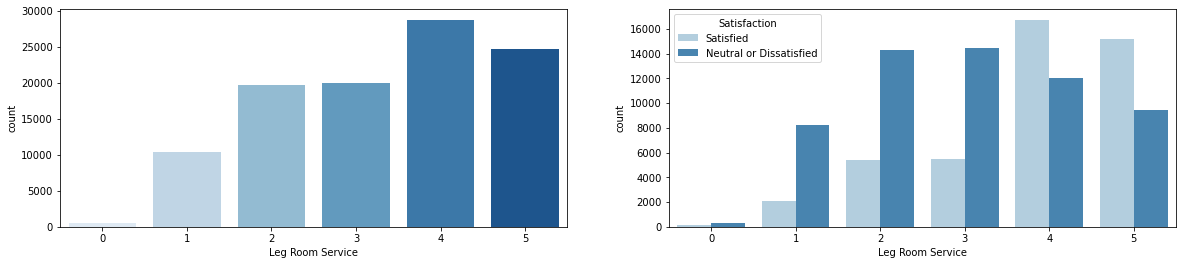

<Figure size 1440x288 with 0 Axes>

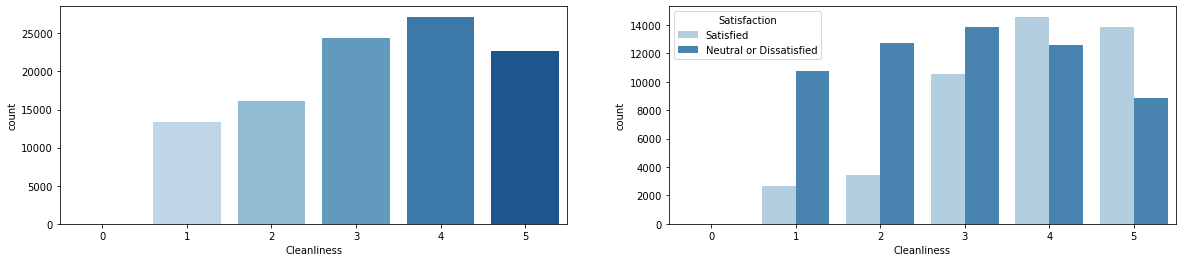

<Figure size 1440x288 with 0 Axes>

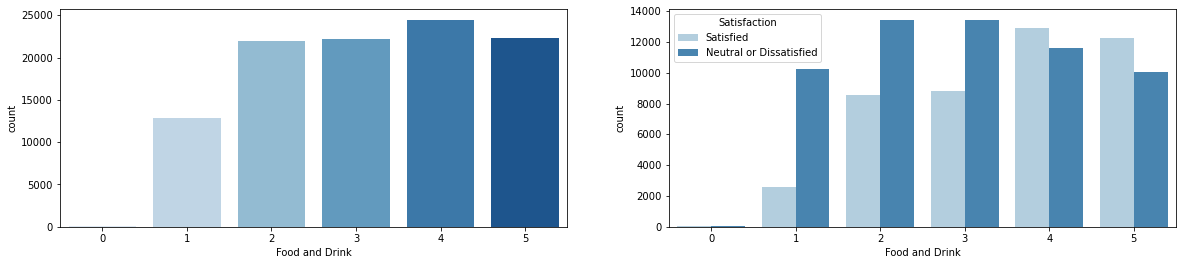

<Figure size 1440x288 with 0 Axes>

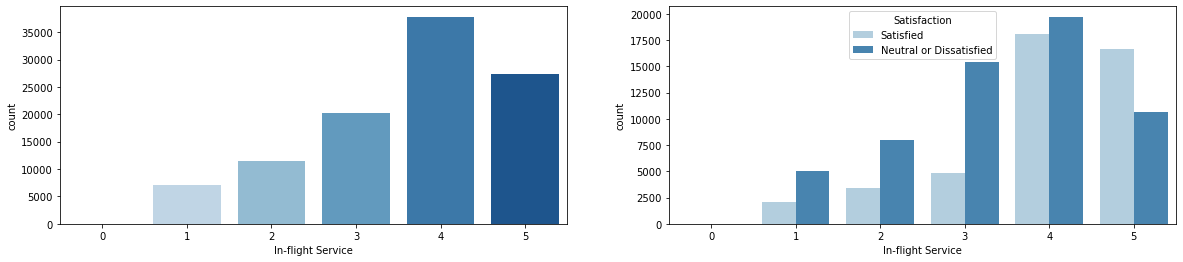

<Figure size 1440x288 with 0 Axes>

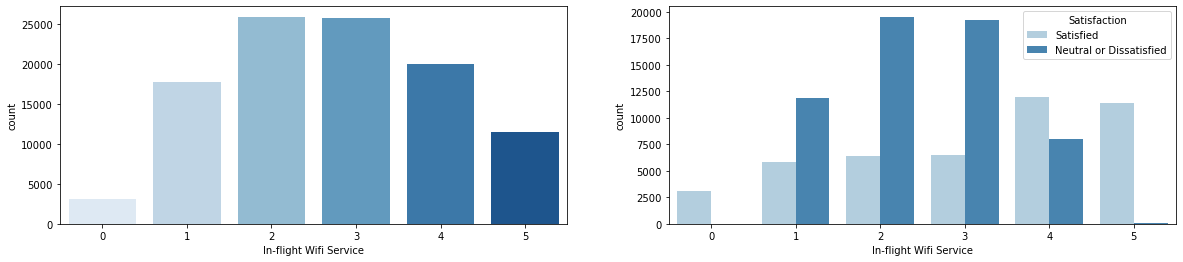

<Figure size 1440x288 with 0 Axes>

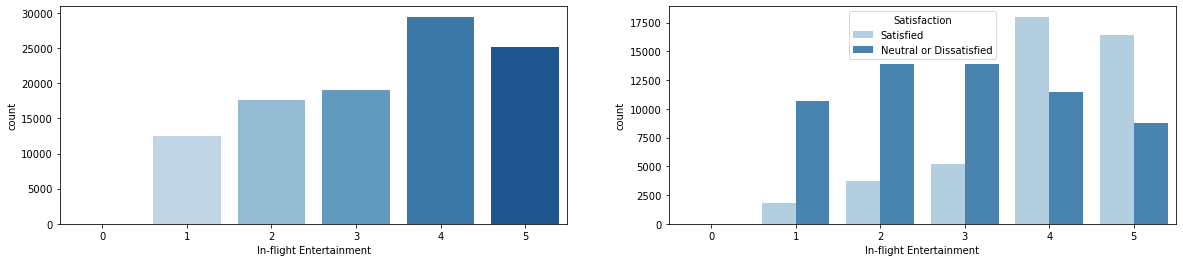

<Figure size 1440x288 with 0 Axes>

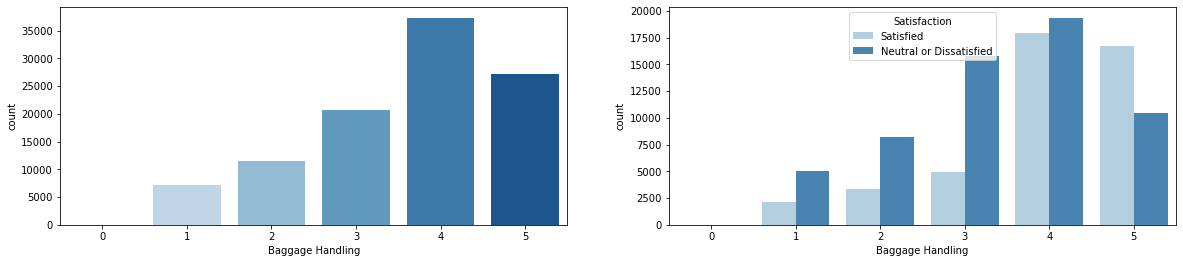

In [24]:
for i in countinous_data:
    if len(train_set[i].unique()) > 10:
    
        plt.figure()
    
        rcParams['figure.figsize'] = (20,3) 
    

        fig, (ax_box, ax_kde) = plt.subplots(ncols=2, sharex=True)
    
        plt.gca().set(xlabel= i,ylabel='Density')    
        sns.boxplot(train_set[i], ax=ax_box , linewidth= 1.0, palette='Blues')
        sns.kdeplot(train_set[i], ax=ax_kde , fill=True, palette='Blues',hue='Satisfaction',data=train_set)
    
        plt.show()
        
    else:
        
        plt.figure()
    
        rcParams['figure.figsize'] = (20,4) 
    

        fig, (ax_count, ax_count_h) = plt.subplots(ncols=2, sharex=True)
    
        plt.gca().set(xlabel= i,ylabel='Density')    
        sns.countplot(train_set[i], ax=ax_count , linewidth= 1.0, palette='Blues',order=[0,1,2,3,4,5])
        sns.countplot(train_set[i], ax=ax_count_h , linewidth= 1.0, palette='Blues',hue=train_set['Satisfaction'],
                     order=[0,1,2,3,4,5])
    
        plt.show()
        
rcParams['figure.figsize'] = (20,10) 

### Ok looks like 3 features are continous rest of the features are discreate...

### Let's go through the continous data first :

<Figure size 1440x720 with 0 Axes>

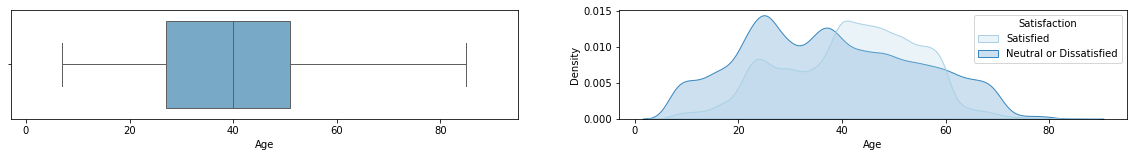

<Figure size 1440x144 with 0 Axes>

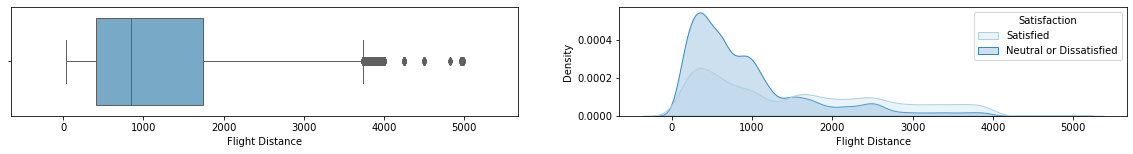

<Figure size 1440x144 with 0 Axes>

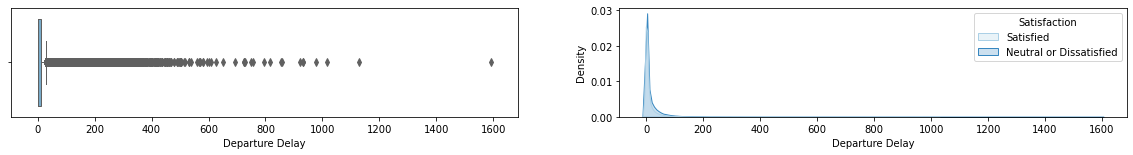

In [25]:
for i in ["Age", "Flight Distance", "Departure Delay"]:
    plt.figure()
    
    rcParams['figure.figsize'] = (20,2) 

    fig, (ax_box, ax_kde) = plt.subplots(ncols=2, sharex=True)
    
    plt.gca().set(xlabel= i,ylabel='Density')    
    sns.boxplot(train_set[i], ax=ax_box , linewidth= 1.0, palette='Blues')
    sns.kdeplot(train_set[i], ax=ax_kde , fill=True, palette='Blues',hue='Satisfaction',data=train_set)
    
    plt.show()
        
rcParams['figure.figsize'] = (20,10) 

### There is very high skewness in `Deprature Delay` and  `Flight Distance`

### Such thing needs to be treated before the model.... but first let's check if they were outliers :

### Let's  have a stronger visualizations to help us know more about our data.... I will save `train_set` data and I will do some analysis on it then I will continue working on it again.

In [26]:
train_set.to_csv('Datasets/Data_for_more_analysis.csv')

### Let's have the following visualization to help us understand the data better :

In [27]:
%%html

<div class='tableauPlaceholder' id='viz1677323998904' style='position: relative'><noscript><a href='#'><img alt='Story 1 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;XH&#47;XHBXRR6XX&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='path' value='shared&#47;XHBXRR6XX' /> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;XH&#47;XHBXRR6XX&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1677323998904');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [28]:
train_set.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
57644,Male,56,Returning,Business,Business,1848,0,4,4,3,...,4,5,4,1,4,4,4,4,4,Satisfied
103332,Female,70,Returning,Personal,Economy,1371,3,5,3,3,...,1,5,3,4,4,1,3,1,1,Neutral or Dissatisfied
76605,Female,48,Returning,Business,Business,2473,0,3,1,5,...,5,5,5,5,4,5,3,5,5,Satisfied
121595,Male,63,Returning,Personal,Economy,912,40,1,3,2,...,4,5,4,5,5,2,3,5,2,Neutral or Dissatisfied
107087,Male,57,Returning,Business,Business,562,12,4,4,3,...,4,4,4,3,4,4,4,4,4,Satisfied


## Let's see how will we treat skewness :

In [29]:
train_set[['Flight Distance','Departure Delay']].skew()

Flight Distance    1.108637
Departure Delay    6.832350
dtype: float64

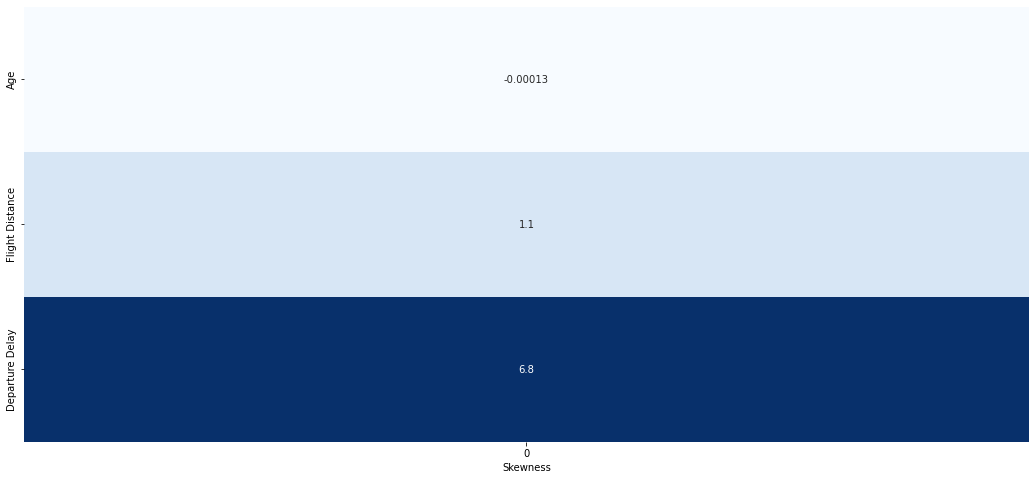

In [30]:
plt.figure(figsize=(18, 8))

sns.heatmap(pd.DataFrame(train_set[['Flight Distance','Departure Delay','Age']].skew().sort_values(ascending=True)),
            cmap='Blues',annot=True,cbar=False)
plt.xlabel('Skewness')

plt.show()

## `Flight Distance` column

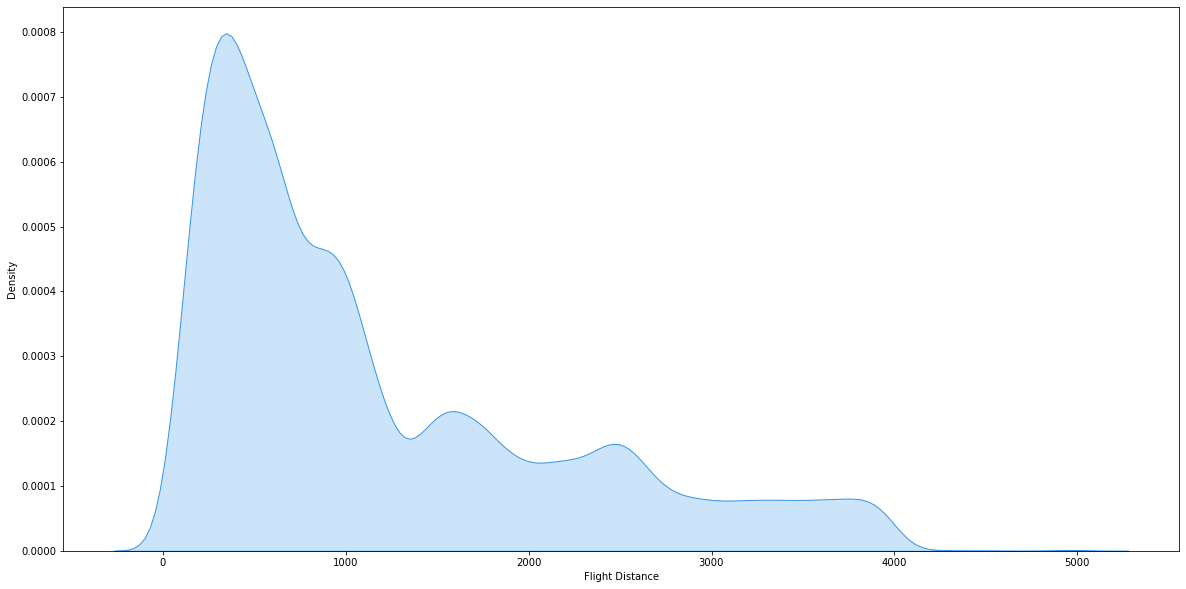

In [31]:
rcParams['figure.figsize'] = (20,10)

sns.kdeplot(train_set['Flight Distance'], fill=True, color='#3495eb')
plt.show()

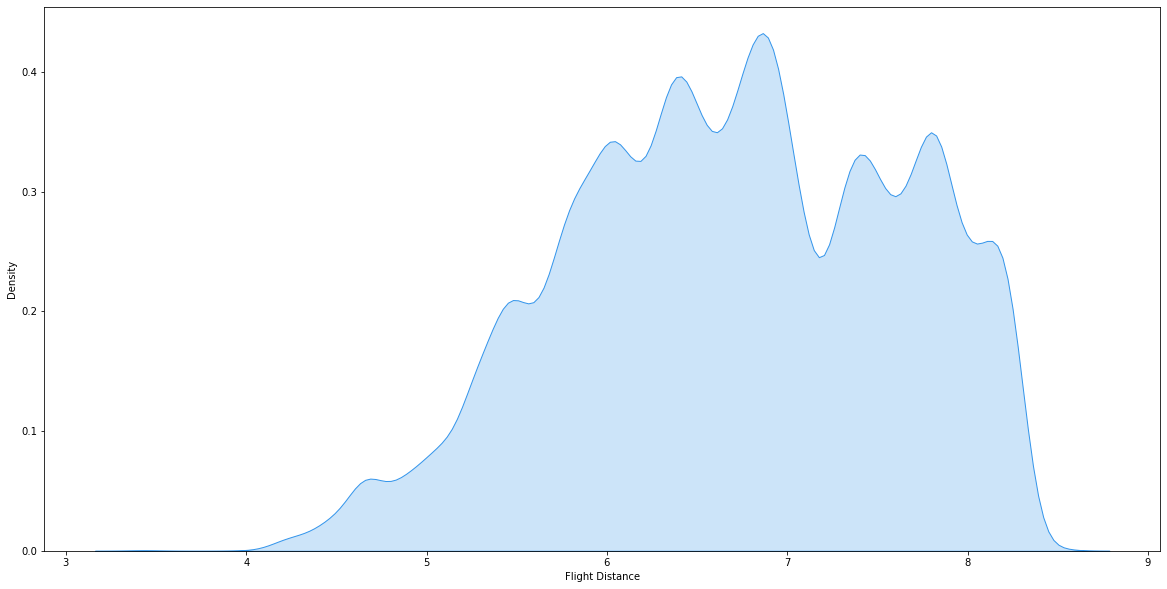

In [32]:
train_set['Flight Distance'] = np.log(train_set['Flight Distance'])
rcParams['figure.figsize'] = (20,10)

sns.kdeplot(train_set['Flight Distance'], fill=True, color='#3495eb')
plt.show()

## `Departure Delay` column :

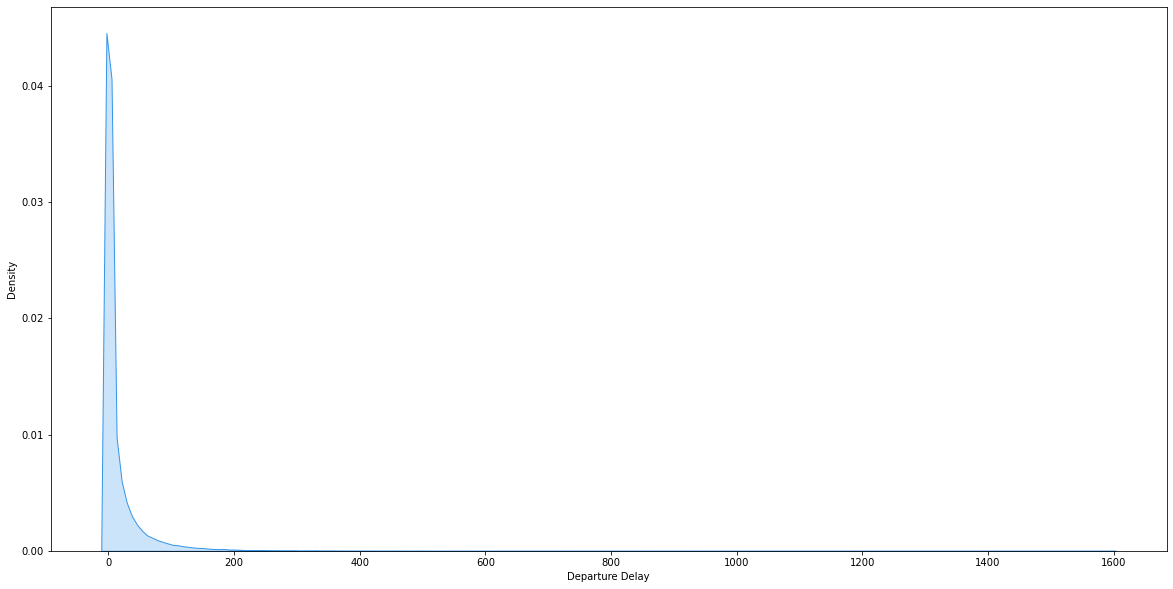

In [33]:
rcParams['figure.figsize'] = (20,10)

sns.kdeplot(train_set['Departure Delay'], fill=True, color='#3495eb')
plt.show()

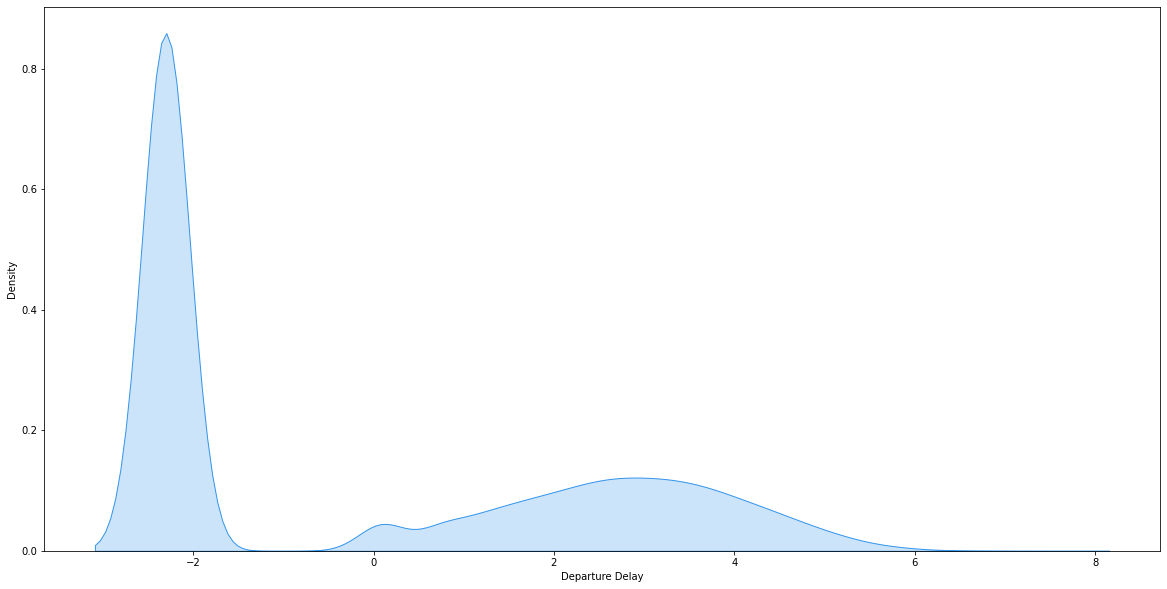

In [34]:
train_set['Departure Delay'] = np.log(train_set['Departure Delay'] + 0.1)
rcParams['figure.figsize'] = (20,10)

sns.kdeplot(train_set['Departure Delay'], fill=True, color='#3495eb')
plt.show()

### Skewness Now :

In [35]:
train_set[['Flight Distance','Departure Delay']].skew()

Flight Distance   -0.208469
Departure Delay    0.573941
dtype: float64

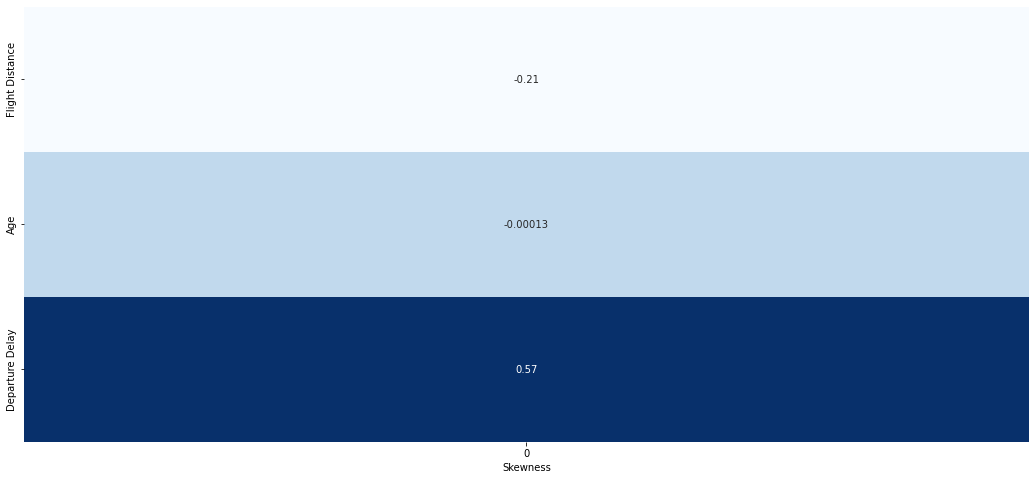

In [36]:
plt.figure(figsize=(18, 8))

sns.heatmap(pd.DataFrame(train_set[['Flight Distance','Departure Delay','Age']].skew().sort_values(ascending=True)),
            cmap='Blues',annot=True,cbar=False)
plt.xlabel('Skewness')

plt.show()

### Looks like log transform is generally good

### Ok I will need to remove the high skewness of the data in `x_train` and `y_train` before the model

### Last thing I want to do before going to the model is the undersampling,<br><br> I will do the undersampling on the `X_train` and `Y_train` data

In [37]:
print(Fore.LIGHTBLUE_EX,'shape of x before undersampling',X_train.shape)
print(Fore.LIGHTBLUE_EX,'shape of y before undersampling',y_train.shape)

 shape of x before undersampling (103904, 23)
 shape of y before undersampling (103904, 1)


In [38]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train, y_train = rus.fit_resample(X_train, y_train)

print(Fore.LIGHTBLUE_EX,'shape of x after undersampling',X_train.shape)
print(Fore.LIGHTBLUE_EX,'shape of y after undersampling',y_train.shape)

 shape of x after undersampling (90284, 23)
 shape of y after undersampling (90284, 1)


### Ok i am ready for the model now... All what I want to do now is to process the x_train, y_train data (I havn't done anything on them yet) using pipelines and make them ready for the models

### Ok now I can say that my data is ready to be finally processed for the Machine learning model :

## Before we go let's shuffle the data :

In [39]:
from sklearn.utils import shuffle

to_shuffle = pd.concat([X_train,y_train],axis=1)

def shuffle_data(df):
    return shuffle(df, random_state=1)

shuffled = shuffle_data(to_shuffle)
X_train = shuffled.drop('Satisfaction',axis=1)
y_train = shuffled[['Satisfaction']]

<br><br><br><br><br><br><br><br><br><br>

### Ok Iam done here.... all what I want to use my python scripts on `X_train` and `y_train` and run the models

### So in the next notebook I won't use train_set again.... It was only for understanding the data<br>But there is one more thing to do...<br>
> - I will save the `X_train`,`y_train`,`X_test`,`y_test` as csv files for the model <br><br>
> - using this no more usefull `train_set` data I will try to get insight about best models to use...

In [40]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

x = train_set.drop('Satisfaction',axis=1)
y = train_set[['Satisfaction']]

sc = StandardScaler()
enc = OrdinalEncoder()
enc_y = OrdinalEncoder()

x.drop(['Gender','Age'],axis=1,inplace=True)
x[['Customer Type','Type of Travel','Class']] = enc.fit_transform(x[['Customer Type','Type of Travel','Class']])

num_cols = []
for i in x.columns:
    if x[i].dtype != 'object':
        num_cols.append(i)
        
x[num_cols] = sc.fit_transform(x[num_cols])

y = enc_y.fit_transform(y)

## Doing same dummy processing on test set :

In [41]:
X_test_dummy = X_test.copy()
y_test_dummy = y_test.copy()

X_test_dummy.drop(['Gender','Age','ID','Arrival Delay'],axis=1,inplace=True)
X_test_dummy[['Customer Type','Type of Travel','Class']] = enc.transform(X_test_dummy[['Customer Type','Type of Travel','Class']])

num_cols = []
for i in x.columns:
    if x[i].dtype != 'object':
        num_cols.append(i)
        
X_test_dummy[num_cols] = sc.transform(X_test_dummy[num_cols])
y_test_dummy = enc_y.transform(y_test_dummy)

## Let's see what kind of algorithms generally gives high score :

In [42]:
# from lazypredict.Supervised import LazyClassifier
# from sklearn.model_selection import train_test_split

# classify = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
# models, predictions = classify.fit(x, X_test_dummy, y, y_test_dummy)

# models.to_csv('Datasets/best_models.csv')

models = pd.read_csv('Datasets/best_models.csv',index_col='Model')
models.head(30)

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.962196,0.958815,0.958815,0.962076,9.611248
RandomForestClassifier,0.960464,0.957160,0.957160,0.960344,9.614481
LGBMClassifier,0.959617,0.955682,0.955682,0.959461,1.052186
XGBClassifier,0.954689,0.952670,0.952670,0.954629,5.689651
BaggingClassifier,0.940368,0.938418,0.938418,0.940311,3.551238
AdaBoostClassifier,0.928318,0.925649,0.925649,0.928208,4.594779
DecisionTreeClassifier,0.915191,0.916866,0.916866,0.915409,0.668036
ExtraTreeClassifier,0.910610,0.909233,0.909233,0.910626,0.303190
BernoulliNB,0.841931,0.838543,0.838543,0.841828,0.209080


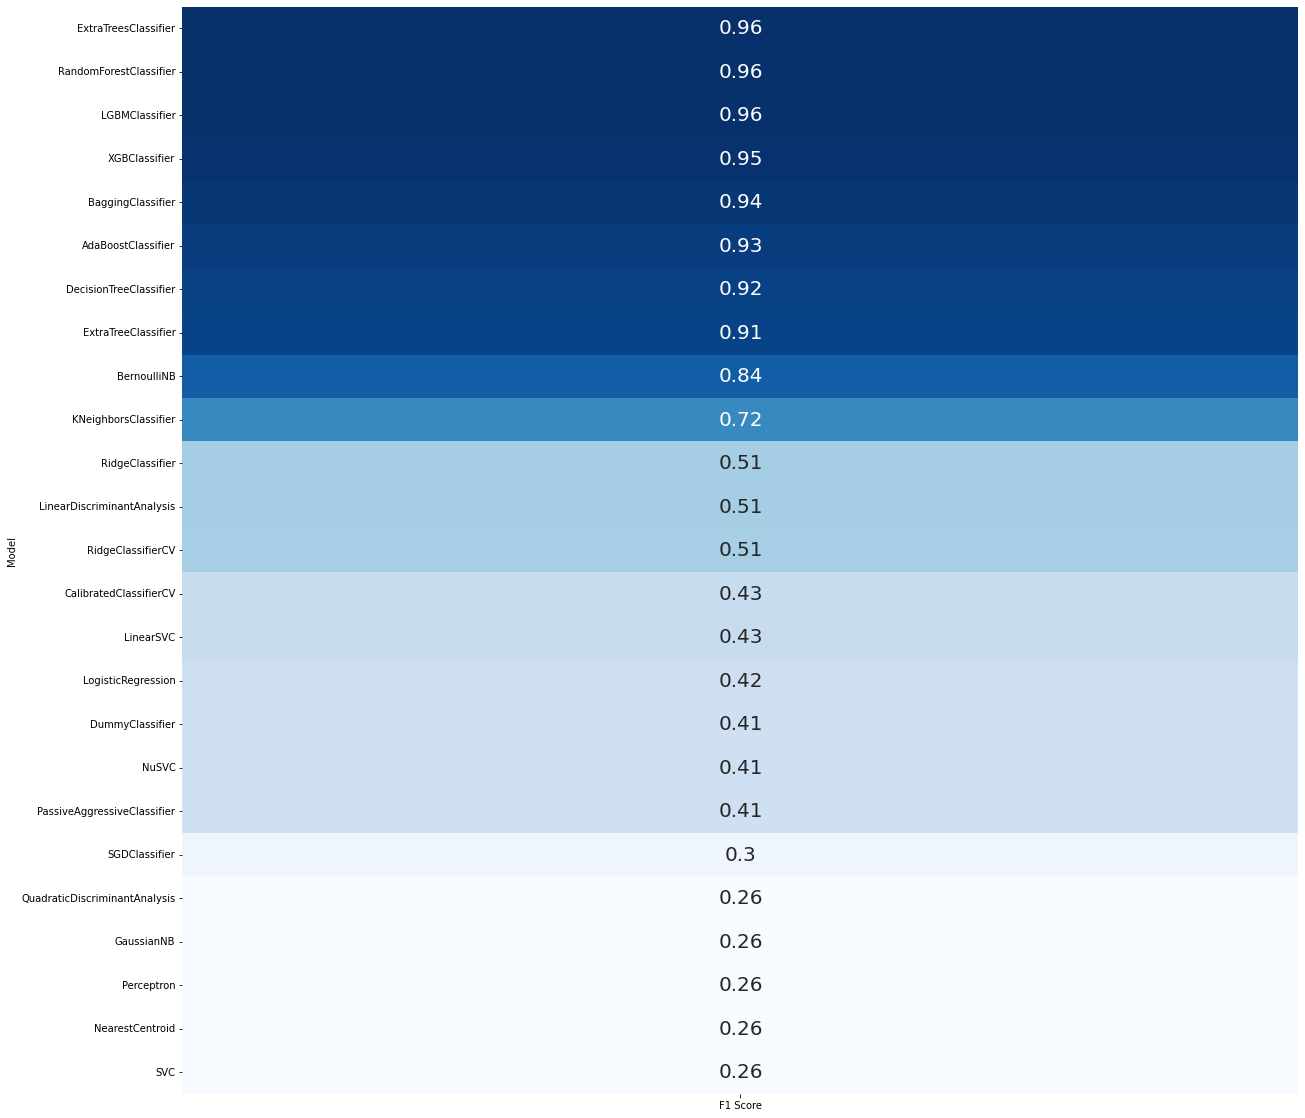

In [43]:
plt.figure(figsize=(20, 20))

sns.heatmap(pd.DataFrame(models['F1 Score']).sort_values(by='F1 Score',ascending=False),
            cmap='Blues',annot=True,cbar=False,annot_kws={"size": 20})

plt.show()

### Ok generally model performs well on `ensample learning models` so I will see more about that in the next notebook

In [44]:
X_train.to_csv('Datasets/xtrain_data.csv')

In [45]:
y_train.to_csv('Datasets/ytrain_data.csv')

In [46]:
X_test.to_csv('Datasets/xtest_data.csv')

In [47]:
y_test.to_csv('Datasets/ytest_data.csv')

# <br><br><br><br> Now let's move to the machine learning and model selection notebooks...<br><br><br><br>